In [270]:
#TODO note à moi-même : regarder les fonctions compare.py qui existent déjà ds mangaki
#revoir ce qu'est pdist et cdist; les différences

In [271]:
#test pr 20 éléments (prendre pê moins que 70 pr rg matrice svd car tourne longtemps 
#mais moins de chance de tomber sur une singular matrix....)

In [272]:
from mangaki.utils.svd import MangakiSVD
import numpy as np
import pandas 
from mangaki.utils.values import rating_values
from math import sqrt
from scipy.spatial.distance import pdist, squareform
import random

#param : taille rang svd
rang_svd=70

ratings = pandas.read_csv('../data/ratings.csv', header=None).as_matrix()
works=pandas.read_csv('../data/works.csv', header=None).as_matrix()
svd =MangakiSVD(rang_svd)
X=ratings[:,0:2]
Y=[rating_values[rating] for rating in ratings[:,2]]
nb_users=X[:,0].max()+1
nb_items=X[:,1].max()+1
svd.set_parameters(nb_users,nb_items)
svd.fit(X,Y)

Computing M: (1721 × 8392)
fill and center matrix [759 ms]
Shapes (1721, 70) (70,) (70, 8392)
factor matrix [3134 ms]


In [273]:
#copie_SVD=svd.VT.copy()
#####################################
####################################
####################################
nb_points=20
#requiert une matrice SVD nommée SVD
#retourne une matrice de similarité similarity

def compute_similarity_coisine(SVD):
    nb_items = np.shape(SVD)[1]
    J = SVD.T.dot(SVD)
    D = np.sqrt(np.diag(J))
    similarity = J / D[:,np.newaxis].dot(D[np.newaxis,:])
    
    
    return similarity

similarity=compute_similarity_coisine(svd.VT)


#######################################
#####################################
#####################################

def sample_k(items, L, k, max_nb_iterations=1000, rng=np.random):
    """
    Sample a list of k items from a DPP defined
    by the similarity matrix L. The algorithm
    is iterative and runs for max_nb_iterations.
    The algorithm used is from
    (Fast Determinantal Point Process Sampling withw
    Application to Clustering, Byungkon Kang, NIPS 2013)
    """
    initial = rng.choice(range(len(items)), size=k, replace=False)
    X = [False] * len(items)
    for i in initial:
        X[i] = True
    X = np.array(X)
    for i in range(max_nb_iterations):
        u = rng.choice(np.arange(len(items))[X])
        v = rng.choice(np.arange(len(items))[~X])
        Y = X.copy()
        Y[u] = False
        L_Y = L[Y, :]
        L_Y = L_Y[:, Y]
        L_Y_inv = np.linalg.inv(L_Y)

        c_v = L[v:v+1, :]
        c_v = c_v[:, v:v+1]
        b_v = L[Y, :]
        b_v = b_v[:, v:v+1]
        c_u = L[u:u+1, :]
        c_u = c_u[:, u:u+1]
        b_u = L[Y, :]
        b_u = b_u[:, u:u+1]

        p = min(1, c_v - np.dot(np.dot(b_v.T, L_Y_inv), b_v) /
                (c_u - np.dot(np.dot(b_u.T, L_Y_inv.T), b_u)))
        if rng.uniform() <= p:
            X = Y[:]
            X[v] = True
    return np.array(items)[X] 


###############################################
###############################################
###############################################

#liste de 10 éléments choisis en utilisant la dpp
items = range(0,nb_items)
sampled_items = sample_k(items, similarity, nb_points)

In [274]:
sampled_items



array([ 355,  636,  965, 1057, 1083, 1965, 2268, 3648, 3706, 3892, 3916,
       4092, 4449, 5583, 5725, 6146, 6650, 7182, 7728, 8047])

In [275]:
#liste de 10 éléments choisis aléatoirement
import random

uniform_items = list(range(similarity.shape[0]))
random.shuffle(uniform_items)
uniform_items = uniform_items[:nb_points]


#comparaison de la somme obtenue des distances

(pdist(svd.VT[:,sampled_items].T)).sum()

13.479983988439212

In [276]:
uniform_items 



[3054,
 4358,
 1661,
 3016,
 7464,
 4292,
 6193,
 9,
 7956,
 6920,
 507,
 7398,
 5016,
 4698,
 1100,
 5781,
 2414,
 3934,
 6081,
 3446]

In [277]:
(pdist(svd.VT[:,uniform_items].T)).sum()
#sample
#uniforms
#compare

16.982798193627669

<IPython.core.display.Javascript object>


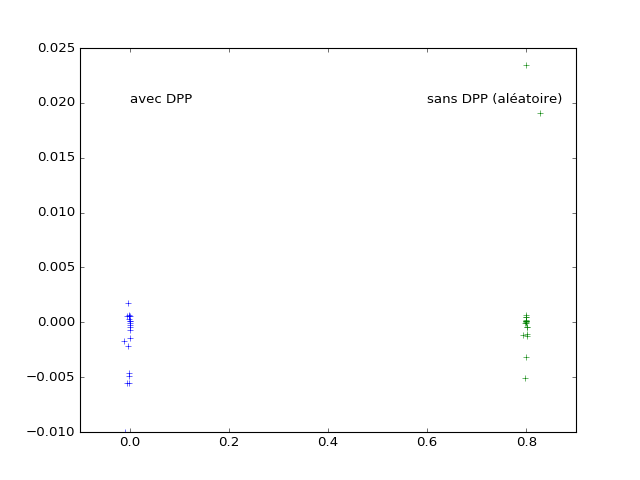

In [278]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.clf()
plt.plot(svd.VT[0, sampled_items], svd.VT[1, sampled_items], '+b')
plt.plot(svd.VT[0, uniform_items]+0.8, svd.VT[1, uniform_items], '+g')
# ! translation des pts choisis aléatoirement pr miexu voir les clusters, illisible graphiquement sinon

In [279]:
plt.text(0, 0.02, 'avec DPP')
plt.text(0.6, 0.02, 'sans DPP (aléatoire)')

In [280]:
#autre test : faire une moyenne de plusieurs tests successifs
#ne marche pas : toujours pas de chance : une singular_matrix apparait
#il serait peut-être bien de vérifier que la matrice est inversible ou alors utiliser ratings directement au lieu de svd.VT
# iteration=0
#tant que iteration !=10, si similarity inversible (utiliser sample_k et iteration++)



In [281]:
from mangaki.utils.svd import MangakiSVD
import numpy as np
import pandas 
from mangaki.utils.values import rating_values
from math import sqrt
from scipy.spatial.distance import pdist, squareform
import random

#param : taille rang svd
rang_svd=20

ratings = pandas.read_csv('../data/ratings.csv', header=None).as_matrix()
works=pandas.read_csv('../data/works.csv', header=None).as_matrix()

X=ratings[:,0:2]
Y=[rating_values[rating] for rating in ratings[:,2]]
nb_users=X[:,0].max()+1
nb_items=X[:,1].max()+1
svd =MangakiSVD(rang_svd)
svd.set_parameters(nb_users,nb_items)
svd.fit(X,Y)


Computing M: (1721 × 8392)
fill and center matrix [766 ms]
Shapes (1721, 20) (20,) (20, 8392)
factor matrix [2026 ms]


In [282]:
#####################################
####################################
####################################
nb_points=10
#requiert une matrice SVD nommée SVD
#retourne une matrice de similarité similarity

def compute_similarity_coisine(SVD):
    nb_items = np.shape(SVD)[1]
    J = SVD.T.dot(SVD)
    D = np.sqrt(np.diag(J))
    similarity = J / D[:,np.newaxis].dot(D[np.newaxis,:])
    
    
    return similarity

similarity=compute_similarity_coisine(svd.VT)


#######################################
#####################################
#####################################

def sample_k(items, L, k, max_nb_iterations=1000, rng=np.random):
    """
    Sample a list of k items from a DPP defined
    by the similarity matrix L. The algorithm
    is iterative and runs for max_nb_iterations.
    The algorithm used is from
    (Fast Determinantal Point Process Sampling withw
    Application to Clustering, Byungkon Kang, NIPS 2013)
    """
    initial = rng.choice(range(len(items)), size=k, replace=False)
    X = [False] * len(items)
    for i in initial:
        X[i] = True
    X = np.array(X)
    for i in range(max_nb_iterations):
        u = rng.choice(np.arange(len(items))[X])
        v = rng.choice(np.arange(len(items))[~X])
        Y = X.copy()
        Y[u] = False
        L_Y = L[Y, :]
        L_Y = L_Y[:, Y]
        L_Y_inv = np.linalg.inv(L_Y)

        c_v = L[v:v+1, :]
        c_v = c_v[:, v:v+1]
        b_v = L[Y, :]
        b_v = b_v[:, v:v+1]
        c_u = L[u:u+1, :]
        c_u = c_u[:, u:u+1]
        b_u = L[Y, :]
        b_u = b_u[:, u:u+1]

        p = min(1, c_v - np.dot(np.dot(b_v.T, L_Y_inv), b_v) /
                (c_u - np.dot(np.dot(b_u.T, L_Y_inv.T), b_u)))
        if rng.uniform() <= p:
            X = Y[:]
            X[v] = True
    return np.array(items)[X] 


###############################################
###############################################
###############################################

#liste de 10 éléments choisis en utilisant la dpp
items = range(0,nb_items)


In [283]:
#liste de 10 éléments choisis aléatoirement

uniform_items = list(range(similarity.shape[0]))
distance_sample=[]
distance_uniform=[]
for i in range(10):
    sampled_items = sample_k(items, similarity, nb_points)
    random.shuffle(uniform_items)
    uniform_items = uniform_items[:nb_points]


#comparaison de la somme obtenue des distances

    distance_sample.append((pdist(svd.VT[:,sampled_items].T)).sum())
    distance_uniform.append((pdist(svd.VT[:,uniform_items].T)).sum())

LinAlgError: Singular matrix

In [ ]:
#moyenne

# Dispersion statistique : diamètre d'ordre r

In [16]:
#Utilisation de diamètre :   
#https://fr.wikipedia.org/wiki/Dispersion_statistique
#https://msh.revues.org/3553?file=1

essai, exemple : diamètre d'ordre 1

In [17]:
sampled_items=[ 929, 1126, 2483, 3511, 4460, 4858, 5163, 5340, 6674, 7700]
 
sampled_items


[929, 1126, 2483, 3511, 4460, 4858, 5163, 5340, 6674, 7700]

In [18]:
uniform_items=[2279, 5704, 8193, 1300, 6718, 3135, 1315, 7801, 472, 4580]
uniform_items


[2279, 5704, 8193, 1300, 6718, 3135, 1315, 7801, 472, 4580]

In [19]:
#nb_points est défini
#pdist(X, euclidian), cdist ? 


distance_sample = squareform(pdist(svd.VT[:,sampled_items].T))
distance_uniform = squareform(pdist(svd.VT[:,uniform_items].T))



In [20]:
#en cours de confection
n=len(sampled_items)
coefficient_sample=2/(n*(n-1))*(pdist(svd.VT[:,sampled_items].T).sum())
coefficient_sample

0.070064303725690141

In [21]:
coefficient_uniform=2/(n*(n-1))*(pdist(svd.VT[:,uniform_items].T).sum())
coefficient_uniform

0.033016864501866749

# Matrice creuse

"matrice creuse" user*item depuis ratings.csv


In [1]:
import pandas
import numpy as np
from scipy.sparse import csc_matrix

ratings = pandas.read_csv('../data/ratings.csv', header=None).as_matrix()
works=pandas.read_csv('../data/works.csv', header=None).as_matrix()

X=ratings[:,0:2]
nb_users=X[:,0].max()+1
nb_items=X[:,1].max()+1


row=ratings[:,0]
col=ratings[:,1]
rating_values = {'favorite': 2, 'like': 2, 'dislike': -2, 'neutral': 0.1, 'willsee': 0.5, 'wontsee': -0.5}
data=np.array([rating_values[rating] for rating in ratings[:,2]])
creuse=csc_matrix((data, (row, col)), shape=(nb_users, nb_items)).toarray()
creuse


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

# Test avec les + populaires

demande de jj

In [285]:
from mangaki.utils.svd import MangakiSVD
import numpy as np
import pandas 
from mangaki.utils.values import rating_values

ratings = pandas.read_csv('../data/ratings.csv', header=None).as_matrix()
works=pandas.read_csv('../data/works.csv', header=None).as_matrix()



In [286]:
svd =MangakiSVD(70)
X=ratings[:,0:2]
Y=[rating_values[rating] for rating in ratings[:,2]]
nb_users=X[:,0].max()+1
nb_items=X[:,1].max()+1
svd.set_parameters(nb_users,nb_items)
svd.fit(X,Y)



Computing M: (1721 × 8392)
fill and center matrix [781 ms]
Shapes (1721, 70) (70,) (70, 8392)
factor matrix [3072 ms]


In [25]:
A=Work.objects.popular()[:50]
#A.tolist()
#A[0]
A[0].title



np.argwhere(works== A[0].title)[0][0]



1352

<IPython.core.display.Javascript object>


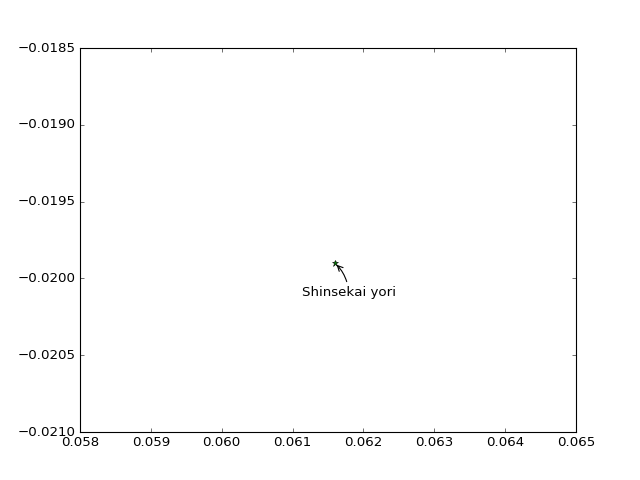

In [55]:
%matplotlib notebook
#ex avec DN
plt.plot(svd.VT[0,7988],svd.VT[1,7988],'*g')#anime

display(7988)

### Pr 50 éléments parmi les populaires : 

<IPython.core.display.Javascript object>


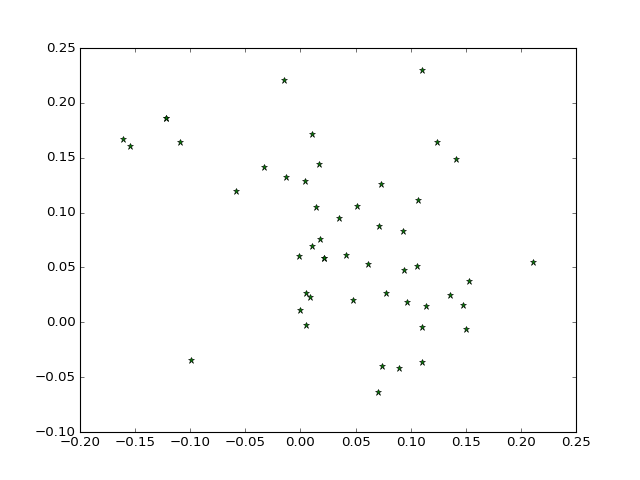

In [27]:
%matplotlib notebook
A=Work.objects.popular()[:50]
liste=[np.argwhere(works== A[i].title)[0][0] for i in range(0,50)]
plt.plot(svd.VT[0,liste],svd.VT[1,liste],'*g')


In [28]:
from scipy.spatial.distance import pdist, squareform

def compute_similarity_coisine(SVD):
    return 1 - squareform(pdist(SVD.T, metric='cosine'))

similarity=compute_similarity_coisine(svd.VT)

In [29]:
def sample_k(items, L, k, max_nb_iterations=1000, rng=np.random):
    """
    Sample a list of k items from a DPP defined
    by the similarity matrix L. The algorithm
    is iterative and runs for max_nb_iterations.
    The algorithm used is from
    (Fast Determinantal Point Process Sampling withw
    Application to Clustering, Byungkon Kang, NIPS 2013)
    """
    initial = rng.choice(range(len(items)), size=k, replace=False)
    X = [False] * len(items)
    for i in initial:
        X[i] = True
    X = np.array(X)
    for i in range(max_nb_iterations):
        u = rng.choice(np.arange(len(items))[X])
        v = rng.choice(np.arange(len(items))[~X])
        Y = X.copy()
        Y[u] = False
        L_Y = L[Y, :]
        L_Y = L_Y[:, Y]
        L_Y_inv = np.linalg.inv(L_Y)

        c_v = L[v:v+1, :]
        c_v = c_v[:, v:v+1]
        b_v = L[Y, :]
        b_v = b_v[:, v:v+1]
        c_u = L[u:u+1, :]
        c_u = c_u[:, u:u+1]
        b_u = L[Y, :]
        b_u = b_u[:, u:u+1]

        p = min(1, c_v - np.dot(np.dot(b_v.T, L_Y_inv), b_v) /
                (c_u - np.dot(np.dot(b_u.T, L_Y_inv.T), b_u)))
        if rng.uniform() <= p:
            X = Y[:]
            X[v] = True
    return np.array(items)[X]

In [30]:
#liste de 10 éléments choisis en utilisant la dpp

sampled_items = sample_k(liste, similarity, 10)

/Users/jin/Sites/mangaki/venv/lib/python3.5/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 8392 but corresponding boolean dimension is 50

/Users/jin/Sites/mangaki/venv/lib/python3.5/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 8392 but corresponding boolean dimension is 50

/Users/jin/Sites/mangaki/venv/lib/python3.5/site-packages/ipykernel/__main__.py:26: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 8392 but corresponding boolean dimension is 50

/Users/jin/Sites/mangaki/venv/lib/python3.5/site-packages/ipykernel/__main__.py:30: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 8392 but corresponding boolean dimension is 50



Etoile rouge : point tiré du sample dpp 

"+" vert : point des 501er anime \n

Etoile bleue : point tiré random uniform

<IPython.core.display.Javascript object>


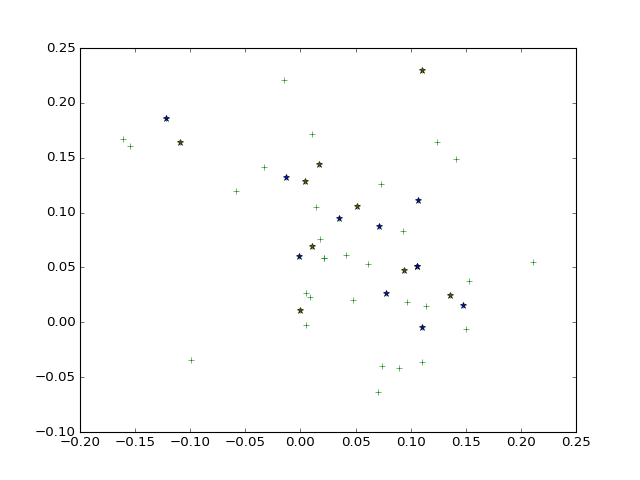

In [31]:
%matplotlib notebook
plt.clf()
plt.plot(svd.VT[0, sampled_items], svd.VT[1, sampled_items], '*r')

In [32]:
plt.plot(svd.VT[0,liste],svd.VT[1,liste],'+g')

In [33]:
print('\n'.join(works[sampled_items,1]))

L'Attaque des Titans
Bleach
Code Geass: Hangyaku no Lelouch
Le Château ambulant
Psycho-Pass
Mirai Nikki
Dragon Ball Z
Tokyo Ghoul
Attaque Des Titans (l')
Kill la Kill


In [34]:
import random
uniform_items = liste
random.shuffle(uniform_items)
uniform_items = uniform_items[:10]

In [35]:
print('\n'.join(works[uniform_items,1]))

Code Geass: Hangyaku no Lelouch R2
Elfen Lied
Fullmetal Alchemist
Death note
Les Enfants Loups : Ame & Yuki
Sword Art Online II
Naruto
Summer Wars
Psycho-Pass
Hunter x Hunter


In [36]:
plt.plot(svd.VT[0, uniform_items], svd.VT[1, uniform_items], '*b')

### Pour 100 éléments : 

In [366]:
limit = 150
A=Work.objects.popular()[:limit]
liste=[np.argwhere(works== A[i].title)[0][0] for i in range(0,limit)]
svd.U.shape

(1721, 70)

In [367]:
#liste de 10 éléments choisis en utilisant la dpp

sampled_items = sample_k(liste, similarity, 5)

/Users/jin/Sites/mangaki/venv/lib/python3.5/site-packages/ipykernel/__main__.py:43: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 8392 but corresponding boolean dimension is 150

/Users/jin/Sites/mangaki/venv/lib/python3.5/site-packages/ipykernel/__main__.py:44: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 8392 but corresponding boolean dimension is 150

/Users/jin/Sites/mangaki/venv/lib/python3.5/site-packages/ipykernel/__main__.py:49: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 8392 but corresponding boolean dimension is 150

/Users/jin/Sites/mangaki/venv/lib/python3.5/site-packages/ipykernel/__main__.py:53: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 8392 but corresponding boolean dimension is 150



In [368]:
sampled_items

array([6420, 8224, 2086, 7008, 1832])

## Méthodes de JJ

In [398]:
for i in sampled_items:
    print(works[i,1])

Summer Wars
Fate/stay night
The Garden of Words
IS: Infinite Stratos
Your Lie in April


In [396]:
def get_coords(work_id):
    return svd.VT[0, work_id], svd.VT[1, work_id]

def get_name(work_id):
    return works[work_id, 1]

def display(work_id):
    x, y = get_coords(work_id)
    print(x, y)
    plt.annotate(get_name(work_id), xy=(x, y), xycoords='data',
                xytext=(30, 20) if x <= 0.1 else (40,40), textcoords='offset points',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3,rad=.2")
                )

In [355]:
svd.VT[0,7578], svd.VT[1,7578]

(0.11387103716101131, 0.014703268567274068)

In [356]:
X = svd.VT.T[sampled_items]
X.shape

(5, 70)

In [399]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=False, C=0.1)
clf.fit(X, [1, 0, 1, 0, 1])
pred = clf.coef_[0]
predx, predy = clf.coef_[0][:2]
clf.predict_proba(X)

array([[ 0.4969875 ,  0.5030125 ],
       [ 0.50183409,  0.49816591],
       [ 0.49874169,  0.50125831],
       [ 0.50167848,  0.49832152],
       [ 0.49897971,  0.50102029]])

In [376]:
predx, predy

(0.0059524096166052995, 0.0017356475515948456)

In [377]:
jjx, jjy = svd.U[1407,0], svd.U[1407,1]

In [378]:
jj = svd.U[1407]
for work_id in sampled_items:
    print(get_name(work_id), round(jj.dot(svd.VT.T[work_id]), 6))

Naruto -0.00756
No Game No Life 0.040908
Code Geass: Hangyaku no Lelouch R2 0.003605
Hyouka 0.007501
Evangelion: 1.0 You Are (Not) Alone -0.017687


<IPython.core.display.Javascript object>


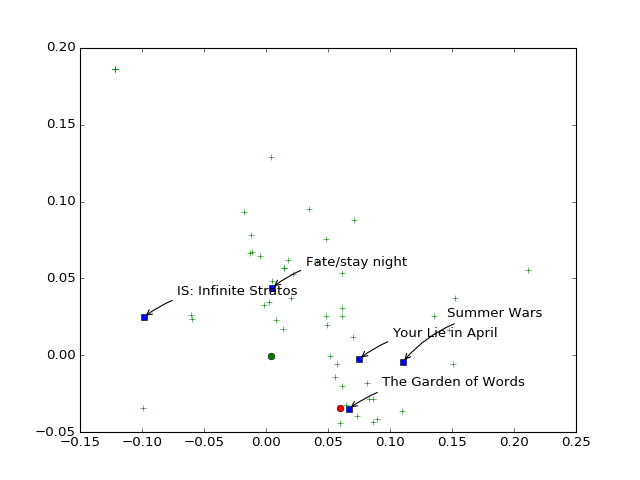

0.110400747982 -0.00420869798303
0.00499051759827 0.0439287695698
0.0667411129298 -0.0348114681094
-0.0985944726447 0.0247907411631
0.0751898544356 -0.00244014448324


In [400]:
%matplotlib notebook

THRESHOLD = 1e-3
#liste = list(filter(lambda work_id: pred.dot(svd.VT.T[work_id]) >= THRESHOLD, liste))
#sampled_items = sample_k(liste, similarity, 5)

fig = plt.figure()
plt.plot(svd.VT[0, sampled_items], svd.VT[1, sampled_items], 'sb')
label = {}
for work_id in liste:
    x, y = svd.VT[0,work_id], svd.VT[1,work_id]
    if work_id not in sampled_items:
        plt.plot(x, y, '+g', picker=5)
    label[(x, y)] = get_name(work_id)
plt.plot(jjx, jjy, 'or')
plt.plot(predx, predy, 'og')

def onpick(event):
    thisline = event.artist
    xdata = thisline.get_xdata()
    ydata = thisline.get_ydata()
    ind = event.ind
    points = tuple(zip(xdata[ind], ydata[ind]))
    x, y = points[0]
    plt.annotate(label[(x, y)], xy=(x, y), xycoords='data',
                xytext=(-30, -30), textcoords='offset points',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3,rad=.2")
                )

fig.canvas.mpl_connect('pick_event', onpick)

for work_id in sampled_items:
    display(work_id)

In [40]:
print('\n'.join(works[sampled_items,1]))

Steins;Gate
Dragon Ball
Fate/Zero
School Days
One piece - Edition originale
Kiki la petite sorcière
K-On!
The Garden of Words
Ghost in the Shell
Chuunibyou demo Koi ga Shitai!


Pr l'instant, après 2/3 essais, j'ai jamais eu deux animes ayant un nom similaire (FMA/FMA Brotherhood, Dragon ball/DBZ par ex, qui par contre st apparus ds uniform)

In [181]:
import random
uniform_items = liste
random.shuffle(uniform_items)
uniform_items = uniform_items[:10]
print('\n'.join(works[uniform_items,1]))

Soul Eater
Nausicaä of the Valley of the Wind
One Piece
Naruto: Shippuuden
Pokemon
D.Gray-man
School Days
Code Geass: Hangyaku no Lelouch
Angel Beats!
Les Enfants Loups : Ame & Yuki


In [187]:
plt.plot(svd.VT[0, uniform_items], svd.VT[1, uniform_items], '.b')

### Pr 150 éléments : 

In [188]:

A=Work.objects.popular()[:150]
liste=[np.argwhere(works== A[i].title)[0][0] for i in range(0,150)]

In [189]:
#liste de 10 éléments choisis en utilisant la dpp
#vérifier en-dessous que chaque item est différent des autres ds la liste (possibilité de doublon)
sampled_items = sample_k(liste, similarity, 10)

/home/voisin/mangaki/venv/lib/python3.4/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 8347 but corresponding boolean dimension is 150

/home/voisin/mangaki/venv/lib/python3.4/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 8347 but corresponding boolean dimension is 150

/home/voisin/mangaki/venv/lib/python3.4/site-packages/ipykernel/__main__.py:26: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 8347 but corresponding boolean dimension is 150

/home/voisin/mangaki/venv/lib/python3.4/site-packages/ipykernel/__main__.py:30: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 8347 but corresponding boolean dimension is 150



<IPython.core.display.Javascript object>


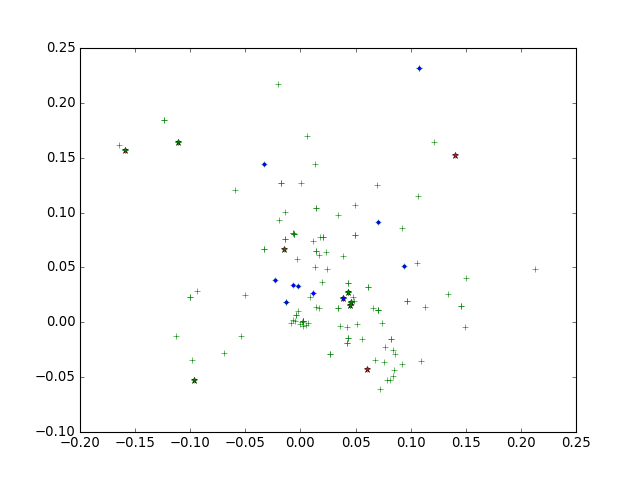

In [190]:
%matplotlib notebook
plt.clf()
plt.plot(svd.VT[0, sampled_items], svd.VT[1, sampled_items], '*r')

In [191]:
plt.plot(svd.VT[0,liste],svd.VT[1,liste],'+g')


In [193]:
sampled_items


array([ 964,  498, 3745, 1641, 2874, 3795, 7958, 7122, 4934, 5264])

In [192]:
print('\n'.join(works[sampled_items,1]))

Fullmetal Alchemist: Brotherhood
Fairy Tail
Yu-Gi-Oh! GX
Bleach
5 centimètres par seconde
Tokyo Ghoul √A
Psycho-Pass 2
Durarara!! Specials
Fate/Stay Night Unlimited Blade Works
Death Parade


In [194]:
# vérifier rapidement/visuellement que deux mêmes items st présents ....
import random
uniform_items = liste
random.shuffle(uniform_items)
uniform_items = uniform_items[:10]
uniform_items

[6926, 5279, 3296, 198, 7081, 7703, 376, 1906, 2566, 4934]

In [195]:
print('\n'.join(works[uniform_items,1]))

Code Geass: Hangyaku no Lelouch
Death note
Pokemon
Accel World
Food wars
Toaru Majutsu no Index
Yu-Gi-Oh!
One Piece
L'Attaque des Titans
Fate/Stay Night Unlimited Blade Works


In [196]:
plt.plot(svd.VT[0, uniform_items], svd.VT[1, uniform_items], '.b')

In [197]:

np.linalg.det(squareform(pdist(svd.VT[:,sampled_items].T)))

-1.1005271185155534e-06

In [198]:
np.linalg.det(squareform(pdist(svd.VT[:,uniform_items].T)))



-9.7330511419462274e-07

In [200]:
distance_sample = squareform(pdist(svd.VT[:,sampled_items].T))
distance_uniform = squareform(pdist(svd.VT[:,uniform_items].T))

In [201]:
#en cours de confection
n=len(sampled_items)
coefficient_sample=2/(n*(n-1))*(pdist(svd.VT[:,sampled_items].T).sum())
coefficient_sample

0.27078550781154692

In [202]:
coefficient_uniform=2/(n*(n-1))*(pdist(svd.VT[:,uniform_items].T).sum())
coefficient_uniform

0.24486066538030776